In [10]:
import pandas as pd

df = pd.read_csv('/content/wattpad_reviews_final.csv')

Number of non-empty lists in content_filtered after conversion:
947
Number of 1-gram lists: 1000
Number of 2-gram lists: 1000
Number of 3-gram lists: 1000
Total 1-grams: 7371
Total 2-grams: 6424
Total 3-grams: 5585
Length of text_1gram: 44094
Length of text_2gram: 76961
Length of text_3gram: 100472


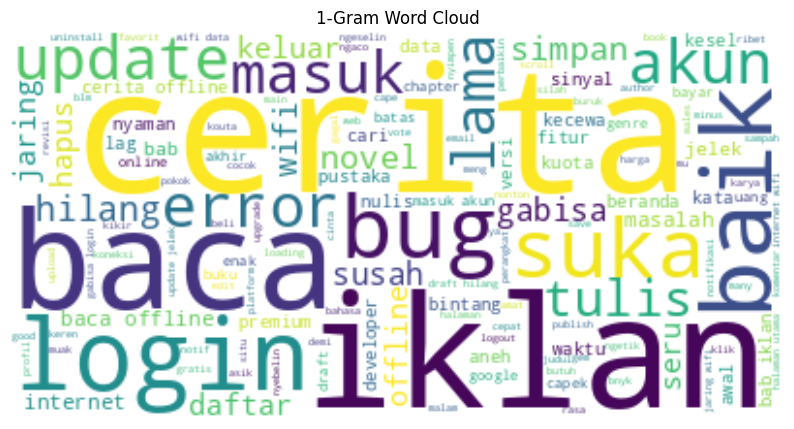

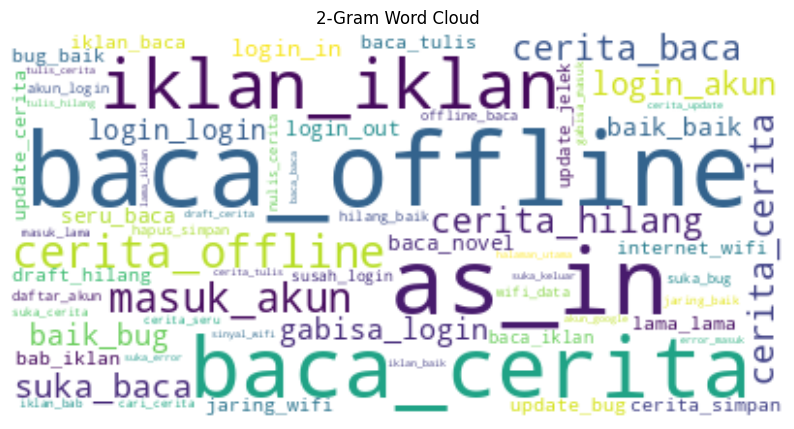

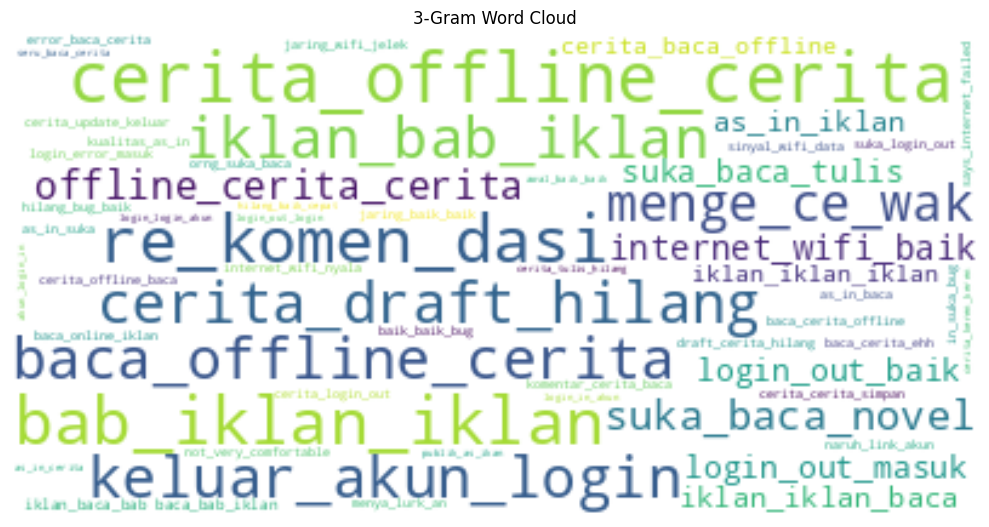

In [11]:
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.util import ngrams
import itertools

# Convert string representation of lists to actual lists
df['content_filtered'] = df['content_filtered'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Check if any list in content_filtered is now not empty
print("Number of non-empty lists in content_filtered after conversion:")
print(df['content_filtered'].apply(lambda x: isinstance(x, list) and len(x) > 0).sum())


def generate_ngrams(tokens, n):
    """Generates n-grams from a list of tokens."""
    if isinstance(tokens, list) and tokens: # Check if tokens is a non-empty list
        return list(ngrams(tokens, n))
    else:
        return []

# Generate 1-grams, 2-grams, and 3-grams
ngrams_1 = df['content_filtered'].apply(lambda x: generate_ngrams(x, 1)).tolist()
ngrams_2 = df['content_filtered'].apply(lambda x: generate_ngrams(x, 2)).tolist()
ngrams_3 = df['content_filtered'].apply(lambda x: generate_ngrams(x, 3)).tolist()

# Check if ngrams lists are populated
print(f"Number of 1-gram lists: {len(ngrams_1)}")
print(f"Number of 2-gram lists: {len(ngrams_2)}")
print(f"Number of 3-gram lists: {len(ngrams_3)}")

# Combine all n-grams into single lists
all_1grams = list(itertools.chain.from_iterable(ngrams_1))
all_2grams = list(itertools.chain.from_iterable(ngrams_2))
all_3grams = list(itertools.chain.from_iterable(ngrams_3))

# Check if combined lists are populated
print(f"Total 1-grams: {len(all_1grams)}")
print(f"Total 2-grams: {len(all_2grams)}")
print(f"Total 3-grams: {len(all_3grams)}")

# Convert n-grams to string format
text_1gram = " ".join([word[0] for word in all_1grams])
text_2gram = " ".join(["_".join(gram) for gram in all_2grams])
text_3gram = " ".join(["_".join(gram) for gram in all_3grams])

# Check if text strings are populated
print(f"Length of text_1gram: {len(text_1gram)}")
print(f"Length of text_2gram: {len(text_2gram)}")
print(f"Length of text_3gram: {len(text_3gram)}")

# Generate and display 1-gram word cloud
wordcloud_1gram = WordCloud(background_color='white').generate(text_1gram)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_1gram, interpolation='bilinear')
plt.axis('off')
plt.title('1-Gram Word Cloud')

# Generate and display 2-gram word cloud
wordcloud_2gram = WordCloud(background_color='white').generate(text_2gram)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_2gram, interpolation='bilinear')
plt.axis('off')
plt.title('2-Gram Word Cloud')

# Generate and display 3-gram word cloud
wordcloud_3gram = WordCloud(background_color='white').generate(text_3gram)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_3gram, interpolation='bilinear')
plt.axis('off')
plt.title('3-Gram Word Cloud')

plt.tight_layout()
plt.show()

In [12]:
# Create DataFrame for 1-grams
df_1gram = pd.DataFrame({
    'content_filtered': df['content_filtered'],
    '1-gram': ngrams_1
})

# Save 1-gram DataFrame to CSV
df_1gram.to_csv('1_gram_analysis.csv', index=False)

# Create DataFrame for 2-grams
df_2gram = pd.DataFrame({
    'content_filtered': df['content_filtered'],
    '2-gram': ngrams_2
})

# Save 2-gram DataFrame to CSV
df_2gram.to_csv('2_gram_analysis.csv', index=False)

# Create DataFrame for 3-grams
df_3gram = pd.DataFrame({
    'content_filtered': df['content_filtered'],
    '3-gram': ngrams_3
})

# Save 3-gram DataFrame to CSV
df_3gram.to_csv('3_gram_analysis.csv', index=False)